# Data Analysis Interview Challenge
## Part 1 ‑ Exploratory data analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(10,6)})

### Data Definition

In [2]:
#load data
df = pd.read_json('logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
#check data type
df.dtypes

login_time    datetime64[ns]
dtype: object

In [4]:
#check for NaNs
df.isna().sum()

login_time    0
dtype: int64

In [5]:
#count number unique values
df.nunique()

login_time    92265
dtype: int64

In [6]:
#get value counts
df.value_counts().head(10)

login_time         
1970-04-12 04:03:15    3
1970-02-12 11:16:53    3
1970-03-14 17:45:52    3
1970-01-06 21:45:52    3
1970-04-04 01:17:40    3
1970-02-24 23:09:57    3
1970-03-29 03:24:57    3
1970-01-09 01:31:25    3
1970-03-17 01:01:39    3
1970-03-24 12:15:24    2
dtype: int64

Seems that there are 93142 total logins, 92265 of which are unique, meaning 877 are logins that have duplicates.
Might this be that different people logged in at the same time or are these errors?
9 of these 877 duplicated logins had 3 duplicates of one login. The others had 2 duplicates

### Resampling Data

In [7]:
#add column with '1' for each login_time: count
df['count'] = 1
df

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


In [8]:
#sort values by login time
df.sort_values('login_time').head(10)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


In [9]:
#Aggregate these login counts based on 15­minute time intervals
df_15min = df.resample('15T', on='login_time').sum()
df_15min

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [10]:
#add day of week column to the data frame, resetting index first
df_15min = df_15min.reset_index()
df_15min['day_of_week'] = df_15min['login_time'].dt.day_name()
df_15min

,login_time,count,day_of_week
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday
...,...,...,...
9783,1970-04-13 17:45:00,5,Monday
9784,1970-04-13 18:00:00,5,Monday
9785,1970-04-13 18:15:00,2,Monday
9786,1970-04-13 18:30:00,7,Monday


Noted that counts didn't seem to match data, so sorted data by time and found the data was out of order.
Not sure if this is an error in the data or not?

### Visualize the Data
visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

In [11]:
#describe data
df_15min.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


<AxesSubplot:xlabel='login_time', ylabel='count'>

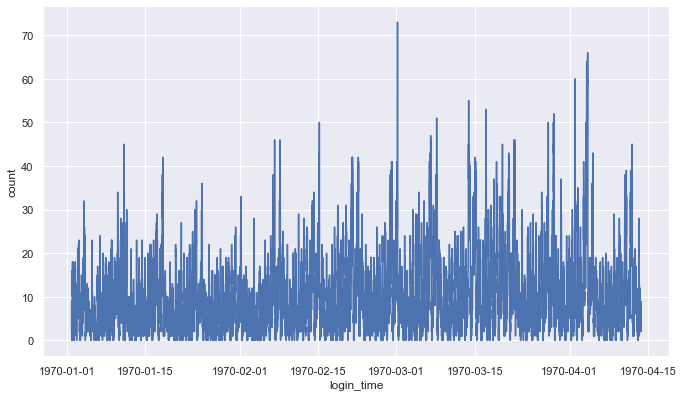

In [12]:
sns.lineplot(data=df_15min, x="login_time", y='count')

<AxesSubplot:xlabel='count', ylabel='Count'>

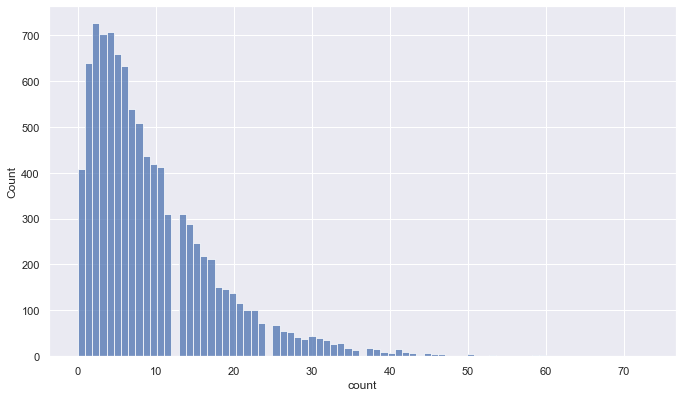

In [13]:
#create histogram of login count data by 15 min interval
sns.histplot(data=df_15min, x="count")

<AxesSubplot:xlabel='login_time', ylabel='count'>

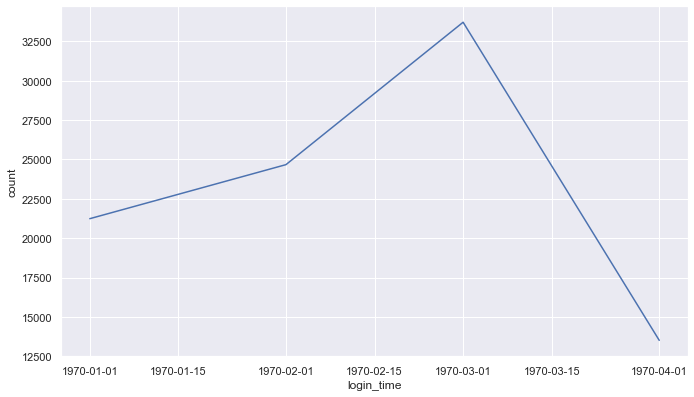

In [14]:
#Aggregate login counts based on monthly time intervals
df_Month = df_15min.resample('MS', on='login_time').sum()
sns.lineplot(data=df_Month, x="login_time", y='count')

<AxesSubplot:xlabel='login_time', ylabel='count'>

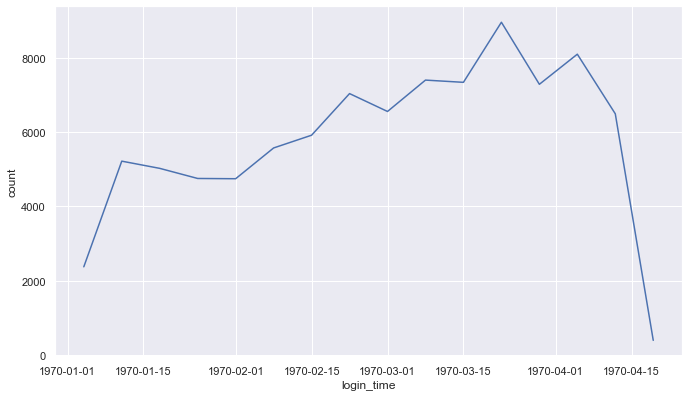

In [15]:
#Aggregate these login counts based on weekly time intervals
df_week = df_15min.resample('W', on='login_time').sum()
sns.lineplot(data=df_week, x="login_time", y='count')

<AxesSubplot:xlabel='login_time', ylabel='count'>

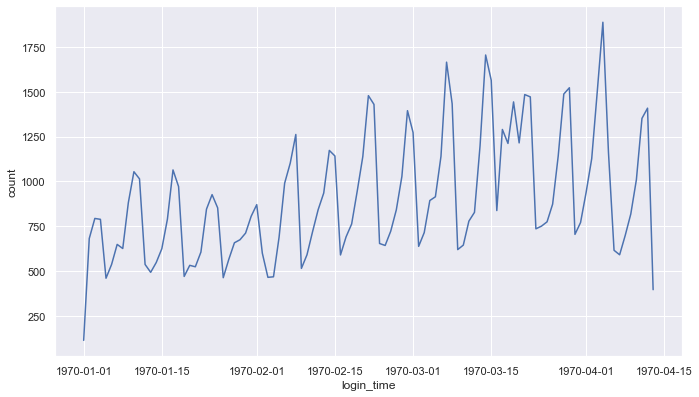

In [16]:
#Aggregate these login counts based on daily time intervals
df_daily = df_15min.resample('D', on='login_time').sum()
sns.lineplot(data=df_daily, x="login_time", y='count')

<AxesSubplot:xlabel='login_time', ylabel='count'>

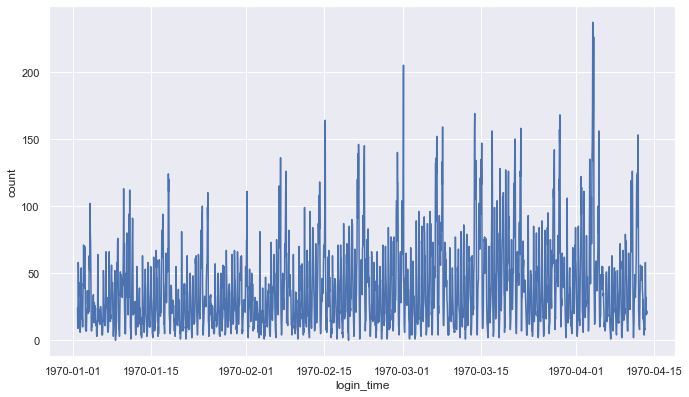

In [17]:
#Aggregate these login counts based on an hourly time intervals
df_hourly = df_15min.resample('H', on='login_time').sum()
sns.lineplot(data=df_hourly, x="login_time", y='count')

It seems like the data has a weekly and daily pattern to the demand, let's dive in deeper to look at this

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

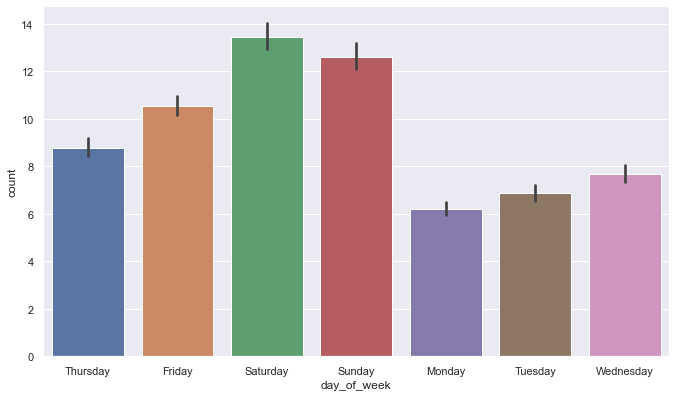

In [45]:
#create bar plot of frequency of login by day of the week
sns.barplot(data=df_15min, x="day_of_week", y='count')

<AxesSubplot:xlabel='login_time', ylabel='count'>

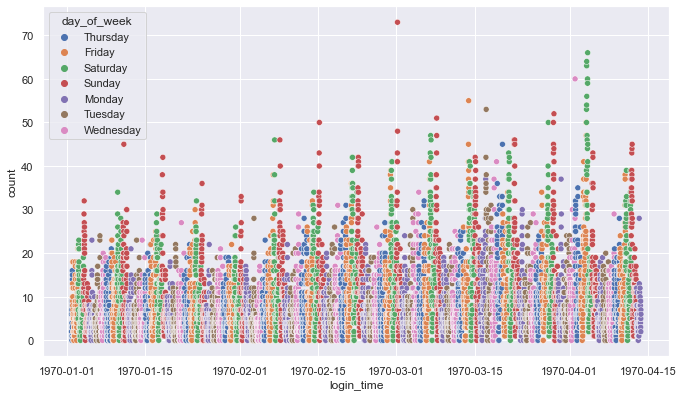

In [19]:
#create scatterplot that shows 15min login counts by day of the week over time
sns.scatterplot(data=df_15min, x="login_time", y="count", hue="day_of_week")

In [20]:
#add day of week column to the hourly data frame, resetting index first
df_daily = df_daily.reset_index()
df_daily['day_of_week'] = df_daily['login_time'].dt.day_name()

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

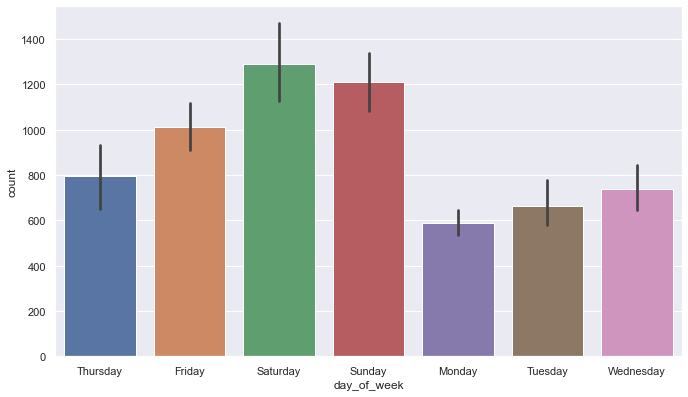

In [44]:
#create bar plot of frequency of login by day of the week
sns.barplot(data=df_daily, x="day_of_week", y='count')

<AxesSubplot:xlabel='login_time', ylabel='count'>

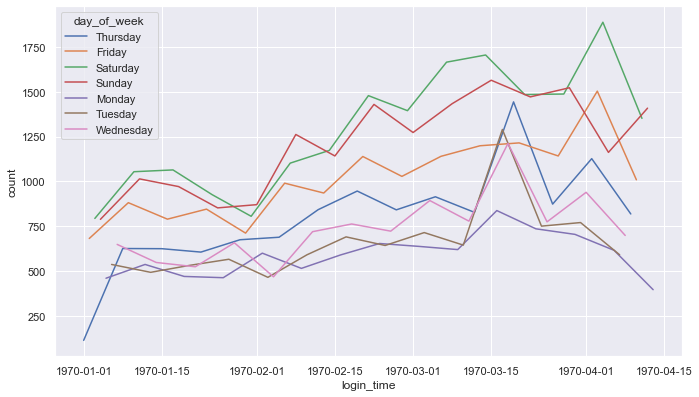

In [22]:
#create scatterplot that shows hourly login counts by day of the week over time
sns.lineplot(data=df_daily, x="login_time", y="count", hue="day_of_week")

In [51]:
df_15min.dtypes

login_time     datetime64[ns]
count                   int64
day_of_week            object
dtype: object

<AxesSubplot:xlabel='login_time', ylabel='count'>

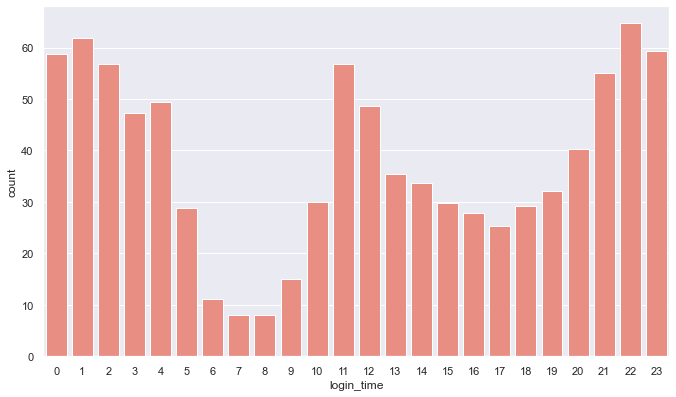

In [58]:
#group average login counts by hour
hour_counts = df_hourly.groupby(df_hourly.index.hour).mean()
#create bar plot of frequency of login counts by hour
sns.barplot(data=hour_counts, x=hour_counts.index, y='count', color="salmon")

In [ ]:
#plot maxes and mins and averages over time!!

## Summary

## Findings

**important features of the demand**
- logins seem to be on a weekly cycyle and also has daily cycles
- weekly cycles high peak with max logins around saturday/sunday 
- weekly cycles has lows around monday/tuesday
- daily cycle has highs around midday (11 am - 12 pm) and also late evening/night (9 pm - 2 am)
- daily cycle has absolute lows 6 am - 9 am, and another relative low from 1 pm - 7 pm
- logins have steadily increasing over time...

Login Count Data - 15 min Aggregations:
- mean	9.515938
- std	8.328818
- min	0.000000
- 25%	3.000000
- 50%	7.000000
- 75%	13.000000
- max	73.000000

**Potential data quality issues**
-  It seems that there are 93142 total logins, 92265 of which are unique, **meaning 877 are logins that have duplicates.** Might this be that different people logged in at the same time or are these errors? 9 of these 877 duplicated logins had 3 duplicates of one login. The others had 2 duplicates.
- Noted that orginal counts didn't seem to match data, so sorted data by time and **found the login data was not always in date order**. Not sure if this is an error in the data or not?
